In [1]:
import csv
data= list()
with open('redditSubmissions.csv', encoding="utf8") as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        data.append(row)

In [2]:
# printing function for first 10 elem
def printFirst10(arr):
    counter = 0
    for a in arr:
        print(a)
        counter+=1
        if (counter==10):
            break

# Determine stats on image IDs
imageCount = dict()
for d in data:
    imgId = d['#image_id']
    if(imgId not in imageCount.keys()):
         imageCount[imgId]=0
    imageCount[imgId] +=1 
    
imagePop = [(k,v) for (k,v) in imageCount.items()]
imagePopSorted = sorted(imagePop, key=lambda tup: tup[1])
imagePopSorted.reverse()

averageImageResub = sum(v for v in imageCount.values())/len(imageCount)
    
print("Image stats: ")
print("\t Amount of different images: " + str(len(imageCount)) + "\n")
print("\t Average amount of image resub: " + str(averageImageResub) + "\n")
print("\t Top 10 most popular image resubs: ")
for i in range(0,10):
    imageId = imagePopSorted[i][0]
    resubAmount = imagePopSorted[i][1]
    print("\t\t" +str(i+1)+ ".) ImageId: " +str(imageId) + ", resub num: " + str(resubAmount))
    
imagePopSorted.reverse()

Image stats: 
	 Amount of different images: 16736

	 Average amount of image resub: 7.905592734225621

	 Top 10 most popular image resubs: 
		1.) ImageId: 6037, resub num: 166
		2.) ImageId: 5919, resub num: 130
		3.) ImageId: 174, resub num: 127
		4.) ImageId: 6219, resub num: 125
		5.) ImageId: 996, resub num: 123
		6.) ImageId: 1757, resub num: 122
		7.) ImageId: 7344, resub num: 114
		8.) ImageId: 2285, resub num: 112
		9.) ImageId: 6233, resub num: 111
		10.) ImageId: 17378, resub num: 110


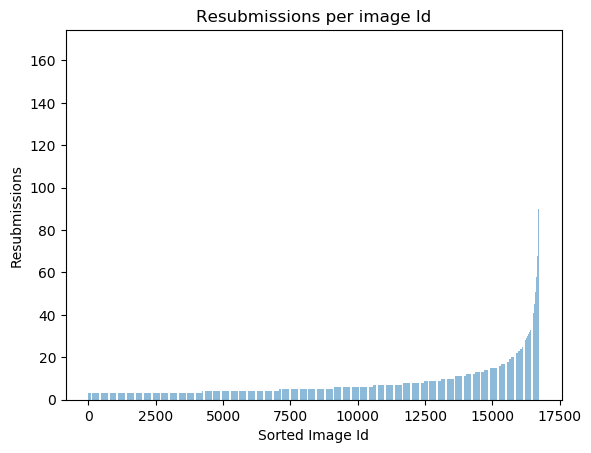

In [3]:
# Looking at Resubmissions per Image Id
%matplotlib inline
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
 
objects = [ k for (k,v) in imagePopSorted]
y_pos = np.arange(len(objects))
performance = [ v for (k,v) in imagePopSorted]
 
plt.bar(y_pos, performance, align='center', alpha=0.5)
# plt.xticks(y_pos, objects)
plt.xlabel('Sorted Image Id')
plt.ylabel('Resubmissions')
plt.title('Resubmissions per image Id')
 
plt.show()

In [4]:
# Determine most relevant words in all titles
import operator
from collections import defaultdict

noTitle = 0
wordFreq = defaultdict(int)

for d in data:
    if(d['title'] ):
        for word in d['title'].split():
            wordFreq[word]+=1
    else:
        noTitle +=1
        
wordPop = [(k,v) for (k,v) in wordFreq.items()]
wordPopSorted = sorted(wordPop, key=lambda tup: tup[1])
wordPopSorted.reverse()

print("Stats of titles: ")
print("\t Amount of posts  without a title: " + str(noTitle))
print("\t Top 10 most popular words in title: ")
for i in range(0,10):
    word = wordPopSorted[i][0]
    freq = wordPopSorted[i][1]
    print("\t\t" +str(i+1)+ ".) " +str(word) + " , freq: " + str(freq))

Stats of titles: 
	 Amount of posts  without a title: 1
	 Top 10 most popular words in title: 
		1.) I , freq: 27539
		2.) the , freq: 21889
		3.) a , freq: 21353
		4.) to , freq: 15623
		5.) of , freq: 12362
		6.) my , freq: 12039
		7.) this , freq: 10750
		8.) in , freq: 9717
		9.) is , freq: 9246
		10.) on , freq: 8709


In [5]:
# Average score associated with each image

imageCount = defaultdict(int)
imageScore = defaultdict(int)
for d in data:
    imgId = d['#image_id']
    if(imgId): 
         if(d['score']):
            imageCount[imgId] +=1 
            imageScore[imgId] += int(d['score'])
            
avgImageScore = defaultdict(int)
for i in imageScore:
    avgImageScore[i] = imageScore[i]/imageCount[i]
    
avgImageScoreList= [(k,v) for (k,v) in avgImageScore.items()]
avgImageScoreSorted = sorted(avgImageScoreList, key=lambda tup: tup[1])
avgImageScoreSorted.reverse()

averageAvgImageScore = sum(v for v in avgImageScore.values())/len(avgImageScore)
    
print("Image stats: ")
print("\t Amount of different images: " + str(len(avgImageScoreSorted)) + "\n")
print("\t Average of average image score: " + str(averageAvgImageScore) + "\n")
print("\t Top 10 image with highest avg score: ")
for i in range(0,10):
    imageId = avgImageScoreSorted[i][0]
    avgScore = avgImageScoreSorted[i][1]
    resubNum = imageCount[imageId]
    print("\t\t" +str(i+1)+ ".) ImageId: " + str(imageId)+ ", resubNum : " + str(resubNum) + ", avg score: " + str(avgScore) )
avgImageScoreSorted.reverse()

Image stats: 
	 Amount of different images: 16736

	 Average of average image score: 284.88267441402576

	 Top 10 image with highest avg score: 
		1.) ImageId: 7395, resubNum : 4, avg score: 2235.75
		2.) ImageId: 22262, resubNum : 5, avg score: 1968.6
		3.) ImageId: 5054, resubNum : 3, avg score: 1828.6666666666667
		4.) ImageId: 18239, resubNum : 3, avg score: 1801.6666666666667
		5.) ImageId: 25306, resubNum : 3, avg score: 1785.0
		6.) ImageId: 18240, resubNum : 3, avg score: 1735.6666666666667
		7.) ImageId: 17600, resubNum : 4, avg score: 1697.75
		8.) ImageId: 9382, resubNum : 4, avg score: 1663.25
		9.) ImageId: 12853, resubNum : 3, avg score: 1662.3333333333333
		10.) ImageId: 3160, resubNum : 3, avg score: 1642.3333333333333


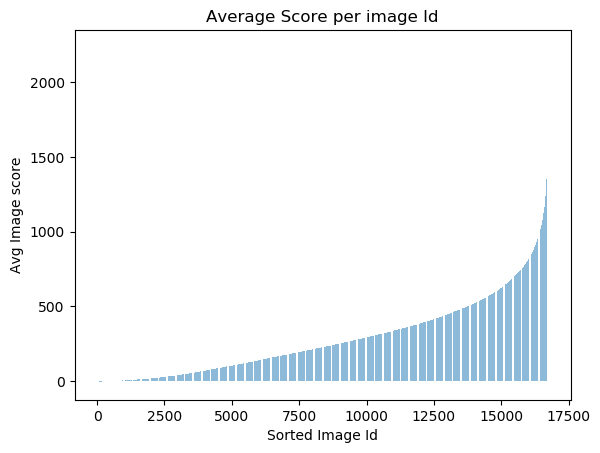

In [6]:
# Looking at Avg score vs Resubmissions
%matplotlib inline
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
 
objects = [ k for (k,v) in avgImageScoreSorted]
y_pos = np.arange(len(objects))
performance = [ v for (k,v) in avgImageScoreSorted]
 
plt.bar(y_pos, performance, align='center', alpha=0.5)
# plt.xticks(y_pos, objects)
plt.xlabel('Sorted Image Id')
plt.ylabel('Avg Image score')
plt.title('Average Score per image Id')
 
plt.show()

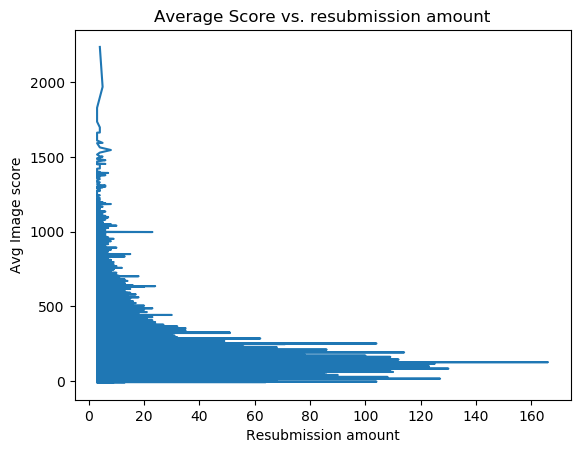

In [7]:
# Looking at Avg score per Image Id
%matplotlib inline
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
 
resubs = [imageCount[k] for (k,v) in avgImageScoreSorted]
avgScore = [ v for (k,v) in avgImageScoreSorted]

plt.xlabel('Resubmission amount')
plt.ylabel('Avg Image score')
plt.title('Average Score vs. resubmission amount')
# plt.scatter(resubs, avgScore)
plt.plot(resubs, avgScore)
plt.show()

In [8]:
# Looking at AVERAGE Total Votes per image

imageCount = defaultdict(int)
imageTotVotes = defaultdict(int)
for d in data:
    imgId = d['#image_id']
    if(imgId): 
         if(d['total_votes']):
            imageCount[imgId] +=1 
            imageTotVotes[imgId] += int(d['total_votes'])
            
avgImageTotVotes = defaultdict(int)
for i in imageTotVotes:
    avgImageTotVotes[i] = imageTotVotes[i]/imageCount[i]
    
avgImageTotVotesList= [(k,v) for (k,v) in avgImageTotVotes.items()]
avgImageTotVotesSorted = sorted(avgImageTotVotesList, key=lambda tup: tup[1])
avgImageTotVotesSorted.reverse()

averageAvgImageTotVotes = sum(v for v in avgImageTotVotes.values())/len(avgImageTotVotes)
    
print("Image stats: ")
print("\t Amount of different images: " + str(len(avgImageTotVotesSorted)) + "\n")
print("\t Average of average image score: " + str(averageAvgImageTotVotes) + "\n")
print("\t Top 10 image with highest avg score: ")
top10AvgTotVotes = list()
for i in range(0,10):
    imageId = avgImageTotVotesSorted[i][0]
    avgTotVotes = avgImageTotVotesSorted[i][1]
    resubNum= imageCount[imageId]
    top10AvgTotVotes.append((imageId,avgTotVotes,resubNum))
    print("\t\t" +str(i+1)+ ".) ImageId: " + str(imageId)+ ", resubNum : " + str(resubNum) + ", avg Tot Votes: " + str(avgTotVotes) )
avgImageTotVotesSorted.reverse()


Image stats: 
	 Amount of different images: 16736

	 Average of average image score: 2403.473524485289

	 Top 10 image with highest avg score: 
		1.) ImageId: 19697, resubNum : 3, avg Tot Votes: 58613.333333333336
		2.) ImageId: 8116, resubNum : 3, avg Tot Votes: 39050.333333333336
		3.) ImageId: 15221, resubNum : 3, avg Tot Votes: 36866.666666666664
		4.) ImageId: 7782, resubNum : 3, avg Tot Votes: 32794.0
		5.) ImageId: 17631, resubNum : 3, avg Tot Votes: 30706.666666666668
		6.) ImageId: 20703, resubNum : 3, avg Tot Votes: 30577.666666666668
		7.) ImageId: 25049, resubNum : 4, avg Tot Votes: 30323.25
		8.) ImageId: 17318, resubNum : 3, avg Tot Votes: 29385.333333333332
		9.) ImageId: 18138, resubNum : 5, avg Tot Votes: 28845.8
		10.) ImageId: 15422, resubNum : 3, avg Tot Votes: 28720.0


In [9]:
counter=1
for (imgId,avgTotalVotes,resubNum) in top10AvgTotVotes:
    print(str(counter)+ ".) Total Values for resubs of image ID: " + str(imgId))
    for d in data:
        if(d['#image_id'] == imgId):
            print("\tTotal Votes: " +str(d['total_votes'] + ", score: " +str(d['score'])))
    counter +=1

1.) Total Values for resubs of image ID: 19697
	Total Votes: 110830, score: 1928
	Total Votes: 46657, score: 629
	Total Votes: 18353, score: 127
2.) Total Values for resubs of image ID: 8116
	Total Votes: 22, score: -12
	Total Votes: 117101, score: 3203
	Total Votes: 28, score: -14
3.) Total Values for resubs of image ID: 15221
	Total Votes: 109867, score: 4249
	Total Votes: 461, score: 249
	Total Votes: 272, score: 50
4.) Total Values for resubs of image ID: 7782
	Total Votes: 96489, score: 3273
	Total Votes: 1850, score: 1104
	Total Votes: 43, score: 5
5.) Total Values for resubs of image ID: 17631
	Total Votes: 85343, score: 2205
	Total Votes: 44, score: 10
	Total Votes: 6733, score: 689
6.) Total Values for resubs of image ID: 20703
	Total Votes: 22, score: -16
	Total Votes: 10, score: -6
	Total Votes: 91701, score: 2539
7.) Total Values for resubs of image ID: 25049
	Total Votes: 118866, score: 3984
	Total Votes: 2186, score: 1324
	Total Votes: 232, score: 166
	Total Votes: 9, sco

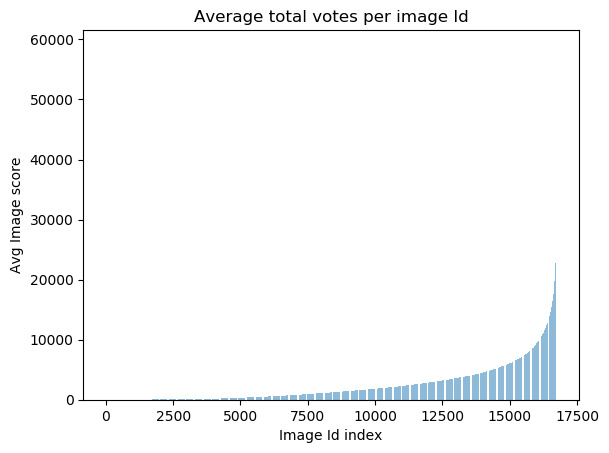

In [10]:
# Looking at Avg Total votes vs Resubmissions
%matplotlib inline
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
 
objects = [ k for (k,v) in avgImageTotVotesSorted]
y_pos = np.arange(len(objects))
performance = [ v for (k,v) in avgImageTotVotesSorted]
 
plt.bar(y_pos, performance, align='center', alpha=0.5)
# plt.xticks(y_pos, objects)
plt.xlabel('Image Id index')
plt.ylabel('Avg Image score')
plt.title('Average total votes per image Id')
 
plt.show()

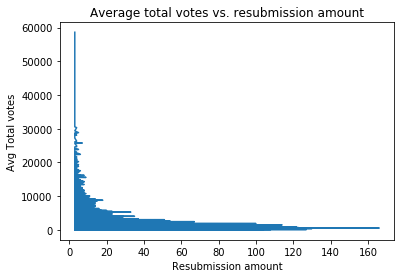

In [11]:
# Looking at Avg total votes per Image Id
%matplotlib inline
 
resubs = [imageCount[k] for (k,v) in avgImageTotVotesSorted]
avgTotalVotes = [ v for (k,v) in avgImageTotVotesSorted]

plt.xlabel('Resubmission amount')
plt.ylabel('Avg Total votes')
plt.title('Average total votes vs. resubmission amount')
# plt.scatter(resubs, avgScore)
plt.plot(resubs, avgTotalVotes) #avgScore)
plt.show()

In [ ]:
# Looking at AVERAGE rating per image
imageCount = defaultdict(int)
imageTotVotes = defaultdict(int)
for d in data:
    imgId = d['#image_id']
    if(imgId): 
         if(d['total_votes']):
            imageCount[imgId] +=1 
            imageTotVotes[imgId] += int(d['total_votes'])
            
avgImageTotVotes = defaultdict(int)
for i in imageTotVotes:
    avgImageTotVotes[i] = imageTotVotes[i]/imageCount[i]
    
avgImageTotVotesList= [(k,v) for (k,v) in avgImageTotVotes.items()]
avgImageTotVotesSorted = sorted(avgImageTotVotesList, key=lambda tup: tup[1])
avgImageTotVotesSorted.reverse()

averageAvgImageTotVotes = sum(v for v in avgImageTotVotes.values())/len(avgImageTotVotes)
    
print("Image stats: ")
print("\t Amount of different images: " + str(len(avgImageTotVotesSorted)) + "\n")
print("\t Average of average image score: " + str(averageAvgImageTotVotes) + "\n")
print("\t Top 10 image with highest avg score: ")
top10AvgTotVotes = list()
for i in range(0,10):
    imageId = avgImageTotVotesSorted[i][0]
    avgTotVotes = avgImageTotVotesSorted[i][1]
    resubNum= imageCount[imageId]
    top10AvgTotVotes.append((imageId,avgTotVotes,resubNum))
    print("\t\t" +str(i+1)+ ".) ImageId: " + str(imageId)+ ", resubNum : " + str(resubNum) + ", avg Tot Votes: " + str(avgTotVotes) )
avgImageTotVotesSorted.reverse()

In [ ]:
#Jaccard similarity and return score of most similar user

# Make dictionary of users and images they have shared
from collections import defaultdict
usersImageSubs = defaultdict(set)
for d in data:
    user = d['username']
    score = d['score']
    usersImageSubs[user].add(score)
    

userSim = defaultdict(lambda: defaultdict(int))
# Find top users that have shared this image
# for (user,images) in usersImageSubs.items():
#     for (user2,images2) in usersImageSubs.items():
#         if ((userSim[user][user2] == 0) & (user2 != user) & (len(images)>0) & (len(images2)>0)):
#             sameImgCount = 0
#             diffCount = 0
#             for a in images:
#                 if( a in images2):  
#                     sameImgCount+=1
#             sim = sameImgCount/(len(images)+len(images2)-sameImgCount)
#             userSim[user][user2] = sim
#             userSim[user2][user] = sim


# return score of most similar user / (LATER:  return weighted score of user submissions according to similarity)

